In [1]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv("Homes for Sale and Real Estate.csv")
df.head(15)

,Address,Price,Description,Place,Beds,Bath,Sq.Ft,Website
0,3704 42 St SW,979999,CA AB T3E 3N1,Glenbrook,4,3.5,1813,Century 21 Bravo Realty
1,30 Mahogany Mews SE 415,439900,CA AB T3M 3H4,Mahogany,2,2.0,1029,Century 21 Bamber Realty Ltd.
2,273 Auburn Shores Way SE,950000,CA AB T3M 2E9,Auburn Bay,4,2.5,2545,Exp Realty
3,235 15 Ave SW 404,280000,CA AB T2R 0P6,Beltline,2,2.0,898,RE/MAX Realty Professionals
4,24 Hemlock Crescent SW 2308,649000,CA AB T3C 2Z1,Spruce Cliff,2,2.0,1482,Charles
5,591 Aboyne Crescent NE,434900,CA AB T2A 5Y7,Abbeydale,6,2.0,1059,Babych Group Central
6,3406 64 St NE,419900,CA AB T1Y4L5,Temple,3,2.5,1218,Diamond Realty & Associates Ltd.
7,10551 Shillington Crescent SW,499900,CA AB T2W 0N8,Southwood,4,2.0,1133,Century 21 Elevate Real Estate
8,928 3 Ave NW 1,269900,CA AB T2N 0J6,Sunnyside,2,1.0,756,Century 21 Bamber Realty Ltd.
9,61 Royal Elm Green NW,627900,CA AB T3G 0G8,Royal Oak,2,2.5,1303,RE/MAX Real Estate (Central)


In [3]:
value=df["Website"].value_counts()
value

Cir Realty                             288
Exp Realty                             247
RE/MAX Real Estate (Central)           227
Real Broker                            206
RE/MAX House Of Real Estate            163
                                      ... 
Listed by Danny Greene                   1
G.M. Bain Real Estate Services Ltd.      1
Park Real Estate Associates Inc.         1
Listed by Navneet Dhillon                1
E-Trinity Realty And Management Ltd      1
Name: Website, Length: 216, dtype: int64

In [4]:
column = df['Sq.Ft']
missing_column = df['Beds'].isnull()
sum_of_missing_rows = missing_column.isnull().sum()
print (sum_of_missing_rows)

0


In [5]:
df.describe()

,Price,Beds,Bath,Sq.Ft
count,3.360000e+03,3360.000000,3360.000000,3360.000000
mean,7.500648e+05,3.125000,2.479167,1558.815179
std,6.447619e+05,1.349087,1.023546,1056.424307
min,1.419000e+05,1.000000,1.000000,307.000000
25%,3.990000e+05,2.000000,2.000000,933.000000
50%,6.199000e+05,3.000000,2.500000,1352.000000
75%,8.499220e+05,4.000000,3.500000,2023.250000
max,1.000000e+07,10.000000,8.000000,39654.000000


In [6]:
print(df.columns)

Index(['Address', 'Price', 'Description', 'Place', 'Beds', 'Bath', 'Sq.Ft',
       'Website'],
      dtype='object')


In [7]:
max_ = df['Sq.Ft'].median()
max_

1352.0

In [8]:
# Open the dataset file
file_path = 'Homes for Sale and Real Estate.csv'  # Replace with the actual path to your dataset file
with open(file_path, 'r') as file:
    # Initialize a line count variable
    line_count = 0

    # Iterate through each line in the file
    for line in file:
        # Increment the line count for each line
        line_count += 1

# Subtract 1 to exclude the header if the dataset has a header
line_count -= 1

# Print the total number of rows
print(f"Number of rows in the dataset: {line_count}")


Number of rows in the dataset: 3360


In [ ]:
column = ['Website']
missing_column = df['Website'].isnull()
num_missing = missing_column.sum()
print (num_missing)


In [9]:
drop = df.drop('Website', axis = 1, inplace = True)
drop

In [10]:
df.head(5)

,Address,Price,Description,Place,Beds,Bath,Sq.Ft
0,3704 42 St SW,979999,CA AB T3E 3N1,Glenbrook,4,3.5,1813
1,30 Mahogany Mews SE 415,439900,CA AB T3M 3H4,Mahogany,2,2.0,1029
2,273 Auburn Shores Way SE,950000,CA AB T3M 2E9,Auburn Bay,4,2.5,2545
3,235 15 Ave SW 404,280000,CA AB T2R 0P6,Beltline,2,2.0,898
4,24 Hemlock Crescent SW 2308,649000,CA AB T3C 2Z1,Spruce Cliff,2,2.0,1482


In [11]:
x = df[['Sq.Ft']]
y = df[['Price']]
model = LinearRegression()
model.fit(x,y)

LinearRegression()

In [19]:
c = model.intercept_
c

array([161630.17523935])

In [20]:
m = model.coef_
m

array([[377.48838264]])

array([[<Axes: title={'center': 'Price'}>,
        <Axes: title={'center': 'Beds'}>],
       [<Axes: title={'center': 'Bath'}>,
        <Axes: title={'center': 'Sq.Ft'}>]], dtype=object)

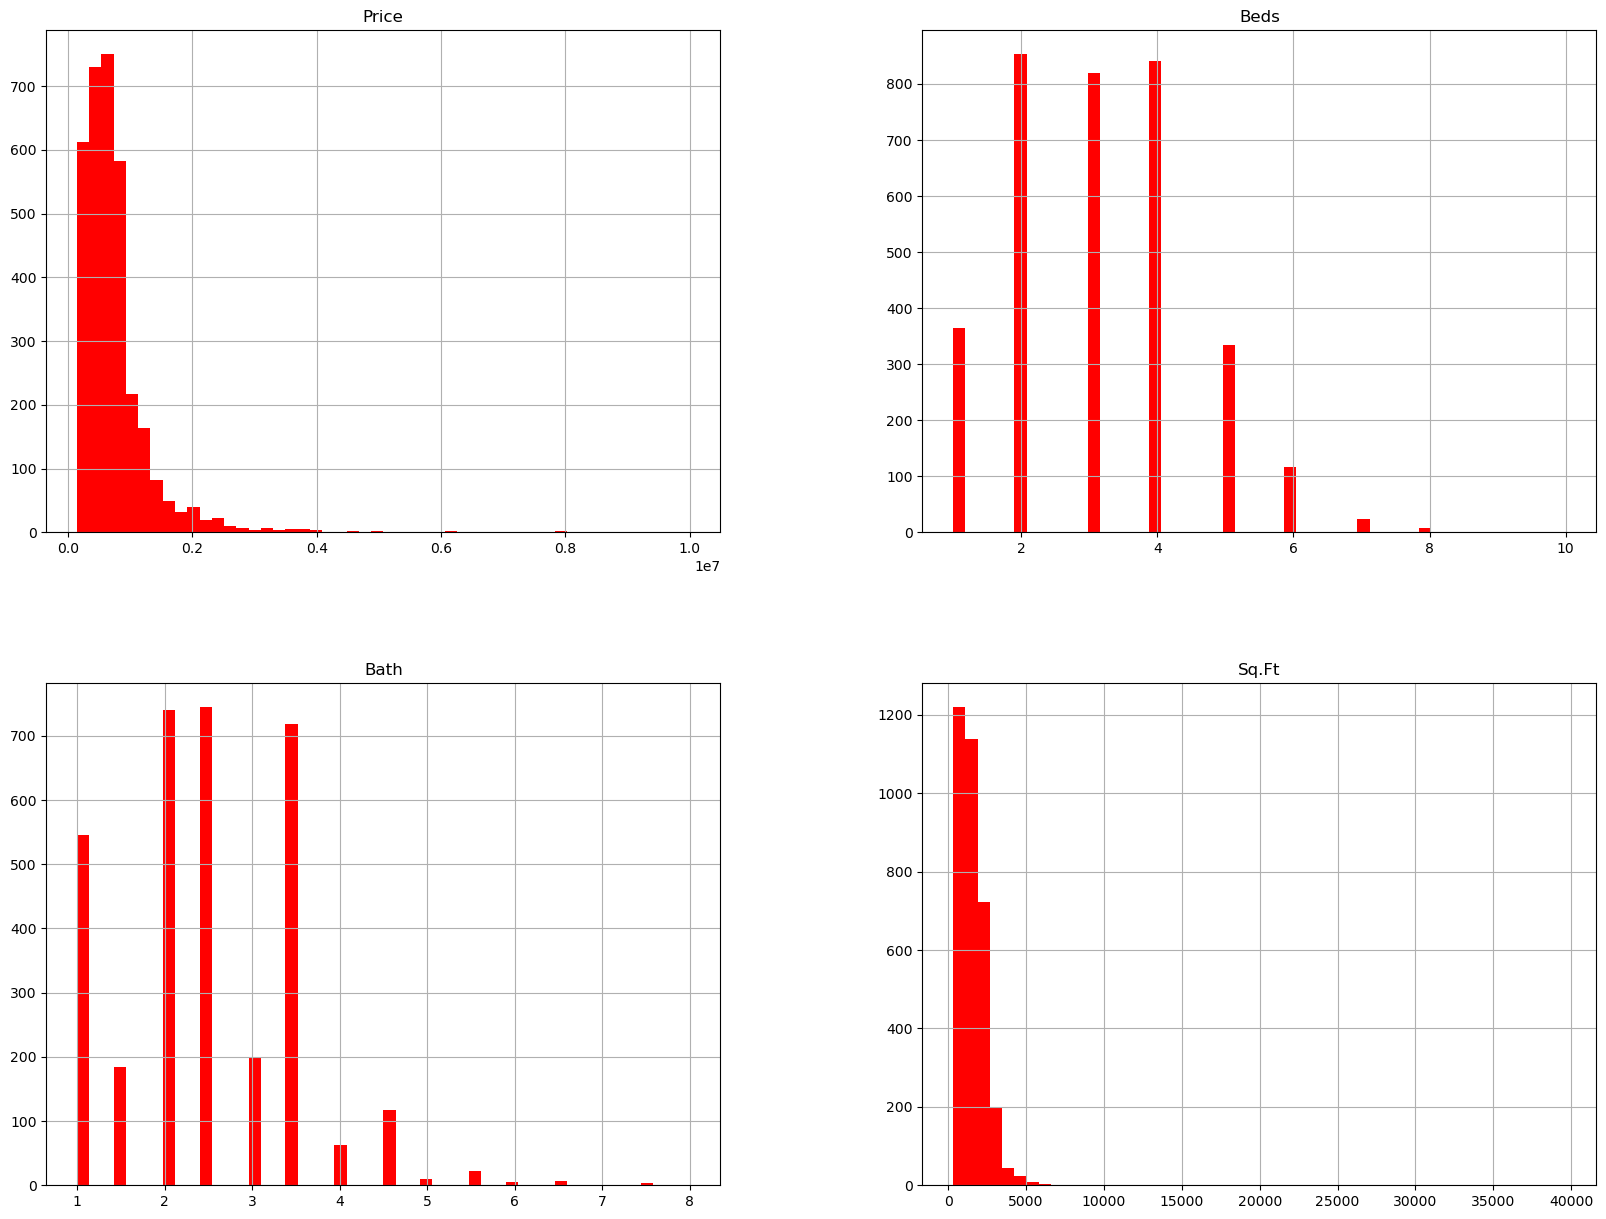

In [21]:
df.hist(bins=50,figsize=(20,15),color = 'red')

In [15]:
corr_matrix = df.corr()
corr_matrix["Price"].sort_values(ascending= False)

C:\Users\HP\AppData\Local\Temp\ipykernel_14352\2684205129.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


Price    1.000000
Sq.Ft    0.618504
Bath     0.578574
Beds     0.428220
Name: Price, dtype: float64

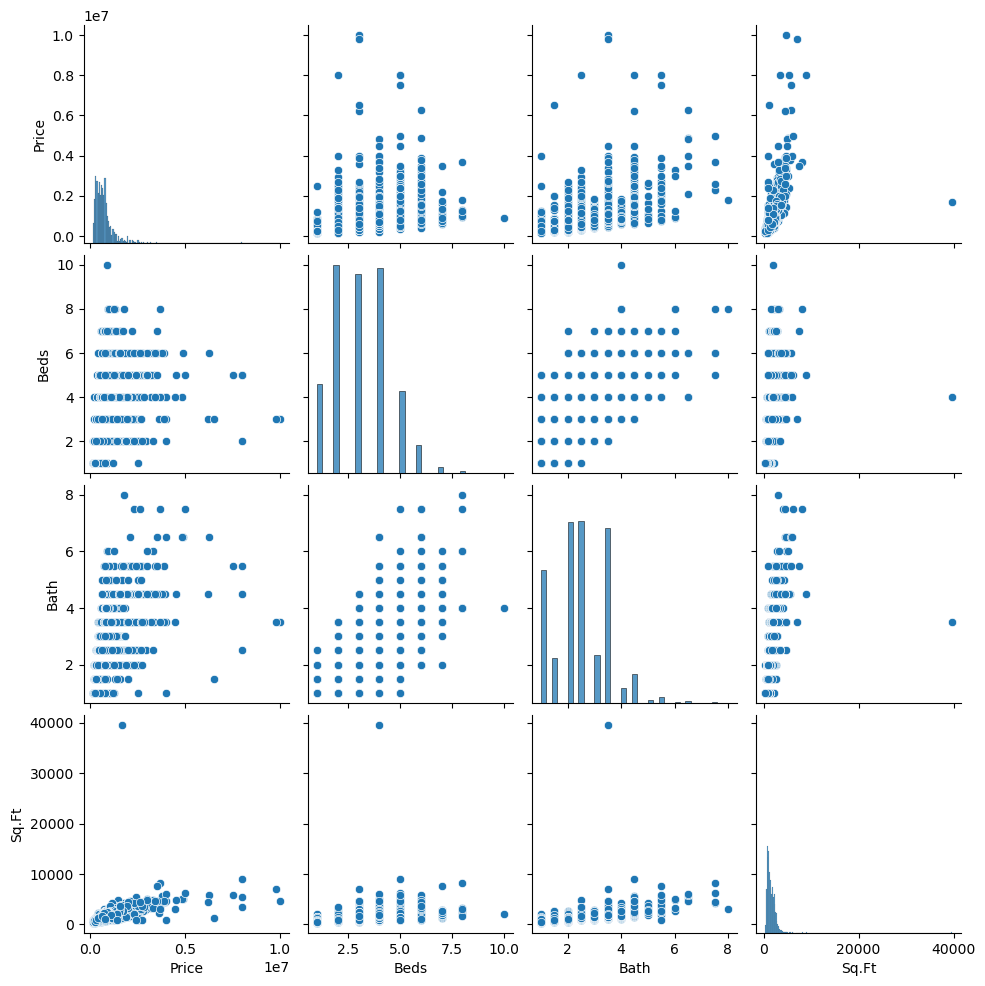

In [16]:
sns.pairplot(df)

C:\Users\HP\AppData\Local\Temp\ipykernel_8940\2732601057.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True,cmap='coolwarm')


<Axes: >

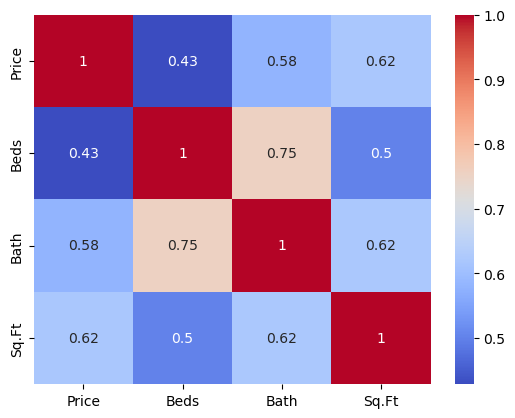

In [17]:
 sns.heatmap(df.corr(), annot=True,cmap='coolwarm')

In [16]:
df.head(5)

,Address,Price,Description,Place,Beds,Bath,Sq.Ft
0,3704 42 St SW,979999,CA AB T3E 3N1,Glenbrook,4,3.5,1813
1,30 Mahogany Mews SE 415,439900,CA AB T3M 3H4,Mahogany,2,2.0,1029
2,273 Auburn Shores Way SE,950000,CA AB T3M 2E9,Auburn Bay,4,2.5,2545
3,235 15 Ave SW 404,280000,CA AB T2R 0P6,Beltline,2,2.0,898
4,24 Hemlock Crescent SW 2308,649000,CA AB T3C 2Z1,Spruce Cliff,2,2.0,1482


In [17]:
df.tail(6)

,Address,Price,Description,Place,Beds,Bath,Sq.Ft
3354,151 Skyview Bay NE Type F,429900,CA AB T3N 1B6,Skyview Ranch,3,2.0,1275
3355,203 17 Ave NE,799000,CA AB T2E 1L9,Tuxedo Park,3,2.0,869
3356,4111 162 Ave SW,8000000,CA AB T2Y 0N7,NAA,5,4.5,9031
3357,289 Sage Hill Circle NW,595000,CA AB T3R 1V2,Sage Hill,3,2.5,1733
3358,738 1 Ave SW 1307,7988000,CA AB T2P 5G8,Eau Claire,2,2.5,3544
3359,1709 32 St SW,795000,CA AB T3C 1N6,Shaganappi,6,2.0,983


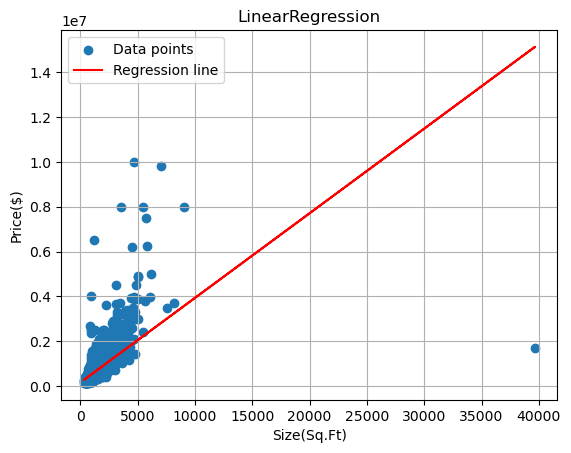

In [18]:
y_predict = model.predict(x)
plt.scatter(x,y, label = 'Data points')
plt.plot(x,y_predict, label = 'Regression line', color = 'red')
plt.xlabel('Size(Sq.Ft)')
plt.ylabel('Price($)')
plt.title('LinearRegression')
plt.legend()
plt.grid(True)
plt.show()

In [93]:
y_predict = model.predict(x)
print(y_predict)

[[ 846016.6129661 ]
 [ 550065.72097616]
 [1122338.10905876]
 ...
 [ 815817.54235488]
 [1499449.00331635]
 [ 532701.25537471]]


In [21]:
X = 300 # Replace with the new land size for which you want to predict the price
predicted_price = model.predict([[X]])[0]
print(f"Predicted Price for New Land Size {X}: {predicted_price}")


Predicted Price for New Land Size 300: [274876.69003142]


C:\Users\HP\AppData\Local\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [32]:
y = m * 39654 + c
print(y)

[[15130554.5004553]]
